<a href="https://colab.research.google.com/github/alf77mevi/CRUD-Equipo5/blob/main/%C2%BFQu%C3%A9_te_pareci%C3%B3_la_pelicula%3F_Modelo_de_regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set()
import statsmodels.api as sm
from sklearn import linear_model

df = pd.read_csv('MovieData.csv')

In [ ]:
peliculas = df[df['Tipo'] == 'Pelicula']
series = df[df['Tipo'] == 'Serie']

In [ ]:
# Obtener el año de lanzamiento más antiguo y más reciente para películas y series


La película más vieja es "El rey leon" lanzada en el año 1994.
La película más nueva es "Spiderman across the spiderverse" lanzada en el año 2023.

La serie más vieja es "Los Simpson" lanzada en el año 1987.
La serie más nueva es "Adventure time: Fionna and Cake" lanzada en el año 2023.


In [ ]:
# ✏️  Deben hacer un análisis previo de los datos (estadística descriptiva) de los datos ej. ¿Cuál es la pelicula mejor o peor calificada por las 20 personas y tu?

# mas vieja y mas nueva
oldest_movie = peliculas.loc[peliculas['AñoLanzamiento'].idxmin(), 'Nombre']
newest_movie = peliculas.loc[peliculas['AñoLanzamiento'].idxmax(), 'Nombre']
oldest_serie = series.loc[series['AñoLanzamiento'].idxmin(), 'Nombre']
newest_serie = series.loc[series['AñoLanzamiento'].idxmax(), 'Nombre']

print(f'La película más vieja es "{oldest_movie}" lanzada en el año {peliculas["AñoLanzamiento"].min()}.')
print(f'La película más nueva es "{newest_movie}" lanzada en el año {peliculas["AñoLanzamiento"].max()}.')
print()
print(f'La serie más vieja es "{oldest_serie}" lanzada en el año {series["AñoLanzamiento"].min()}.')
print(f'La serie más nueva es "{newest_serie}" lanzada en el año {series["AñoLanzamiento"].max()}.')
print()

# con mayor y menor presupuesto
menor_movie = peliculas.loc[peliculas['Presupuesto(MDD)'].idxmin(), 'Nombre']
mayor_movie = peliculas.loc[peliculas['Presupuesto(MDD)'].idxmax(), 'Nombre']
menor_serie = series.loc[series['Presupuesto(MDD)'].idxmin(), 'Nombre']
mayor_serie = series.loc[series['Presupuesto(MDD)'].idxmax(), 'Nombre']

print(f'La pelicula con menor presupuesto es "{menor_movie}" con {peliculas["Presupuesto(MDD)"].min()} MDD.')
print(f'La pelicula con mayor presupuesto es "{mayor_movie}" con {peliculas["Presupuesto(MDD)"].max()}.')
print()
print(f'La serie con menor presupuesto es "{menor_serie}" con {series["Presupuesto(MDD)"].min()} MDD.')
print(f'La serie con mayor presupuesto es"{mayor_serie}" con {series["Presupuesto(MDD)"].max()} MDD.')
print()

# con mejor y peor recaudacion
menor_movie = peliculas.loc[peliculas['Recaudacion(MDD)'].idxmin(), 'Nombre']
mayor_movie = peliculas.loc[peliculas['Recaudacion(MDD)'].idxmax(), 'Nombre']
menor_serie = series.loc[series['Recaudacion(MDD)'].idxmin(), 'Nombre']
mayor_serie = series.loc[series['Recaudacion(MDD)'].idxmax(), 'Nombre']

print(f'La pelicula con menor recaudacion es "{menor_movie}" con {peliculas["Recaudacion(MDD)"].min()} MDD.')
print(f'La pelicula con mayor recaudacion es "{mayor_movie}" con {peliculas["Recaudacion(MDD)"].max()}.')
print()
print(f'La serie con menor recaudacion es "{menor_serie}" con {series["Recaudacion(MDD)"].min()} MDD.')
print(f'La serie con mayor recaudacion es"{mayor_serie}" con {series["Recaudacion(MDD)"].max()} MDD.')
print()

# mas larga, mas corta
peliculas_duracion = peliculas['Duracion(min)']
shortest_movie = peliculas.loc[peliculas['Duracion(min)'].idxmin(), 'Nombre']
longest_movie = peliculas.loc[peliculas['Duracion(min)'].idxmax(), 'Nombre']
shortest_serie = series.loc[series['Duracion(min)'].idxmin(), 'Nombre']
longest_serie = series.loc[series['Duracion(min)'].idxmax(), 'Nombre']

print(f'La película más corta es "{shortest_movie}" con {peliculas["Duracion(min)"].min()} minutos.')
print(f'La película más larga es "{longest_movie}" con {peliculas["Duracion(min)"].max()} minutos.')
print()
print(f'La serie más corta es "{shortest_serie}" con {series["Duracion(min)"].min()} minutos.')
print(f'La serie más larga es "{longest_serie}" con {series["Duracion(min)"].max()} minutos.')
print()

# mejor y peor calificada (online)
worse_movie = peliculas.loc[peliculas['RottenTomatoes'].idxmin(), 'Nombre']
best_movie = peliculas.loc[peliculas['RottenTomatoes'].idxmax(), 'Nombre']
worse_serie = series.loc[series['RottenTomatoes'].idxmin(), 'Nombre']
best_serie = series.loc[series['RottenTomatoes'].idxmax(), 'Nombre']

print(f'La película peor calificada en Rotten Tomatoes es "{worse_movie}" con {peliculas["RottenTomatoes"].min()}%.')
print(f'La película mejor calificada en Rotten Tomatoes  es "{best_movie}" con {peliculas["RottenTomatoes"].max()}%.')
print()
print(f'La serie peor calificada en Rotten Tomatoes es "{worse_serie}" con {series["RottenTomatoes"].min()}%.')
print(f'La serie mejor calificada en Rotten Tomatoes es "{best_serie}" con {series["RottenTomatoes"].max()}%.')
print()

# mejor y peor calificada (equipo)
peliculas_calif_team = peliculas['RatingPromedio']
worse_movie = peliculas.loc[peliculas['RatingPromedio'].idxmin(), 'Nombre']
best_movie = peliculas.loc[peliculas['RatingPromedio'].idxmax(), 'Nombre']
worse_serie = series.loc[series['RatingPromedio'].idxmin(), 'Nombre']
best_serie = series.loc[series['RatingPromedio'].idxmax(), 'Nombre']

print(f'La película peor calificada por el equipo en promedio es "{worse_movie}" con {peliculas["RatingPromedio"].min()}%.')
print(f'La película mejor calificada por el equipo en promedio es "{best_movie}" con {peliculas["RatingPromedio"].max()}%.')
print()
print(f'La serie peor calificada por el equipo en promedio es "{worse_serie}" con {series["RatingPromedio"].min()}%.')
print(f'La serie mejor calificada por el equipo en promedio es "{best_serie}" con {series["RatingPromedio"].max()}%.')
print()

La película más vieja es "El rey leon" lanzada en el año 1994.
La película más nueva es "Spiderman across the spiderverse" lanzada en el año 2023.

La serie más vieja es "Los Simpson" lanzada en el año 1987.
La serie más nueva es "Adventure time: Fionna and Cake" lanzada en el año 2023.

La pelicula con menor presupuesto es "Primer" con 0.007 MDD.
La pelicula con mayor presupuesto es "Avatar" con 237.0.

La serie con menor presupuesto es "Hora de aventura" con 2.0 MDD.
La serie con mayor presupuesto es"Peaky Blinders" con 720.0 MDD.

La pelicula con menor recaudacion es "Primer" con 0.4 MDD.
La pelicula con mayor recaudacion es "Avatar" con 2844.3.

La serie con menor recaudacion es "Hunter x Hunter" con 10.3 MDD.
La serie con mayor recaudacion es"Game of Thrones" con 1460.6 MDD.

La película más corta es "El cadaver de la novia" con 77 minutos.
La película más larga es "Oppenheimer" con 180 minutos.

La serie más corta es "Hora de aventura" con 11 minutos.
La serie más larga es "Peaky

# ✏️  Hagan muchas graficas que sirvan para describir cosas.

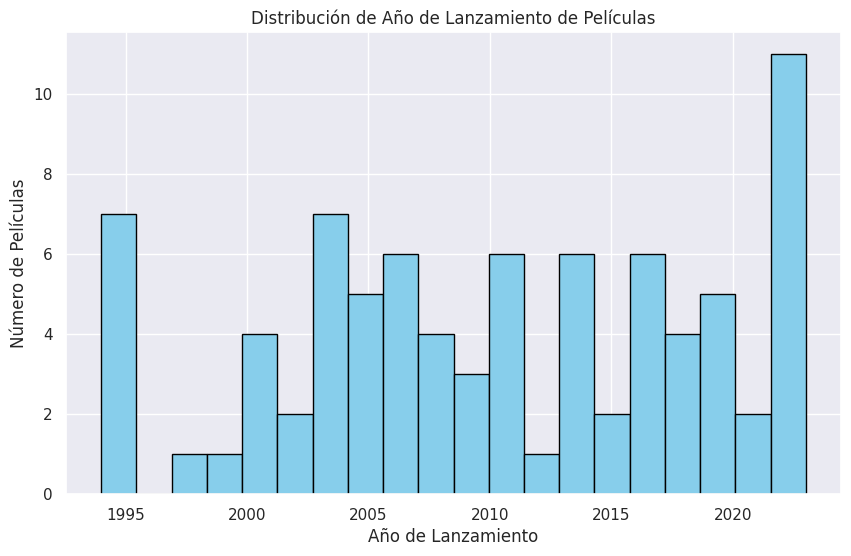

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(peliculas['AñoLanzamiento'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Año de Lanzamiento de Películas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Películas')
plt.show()


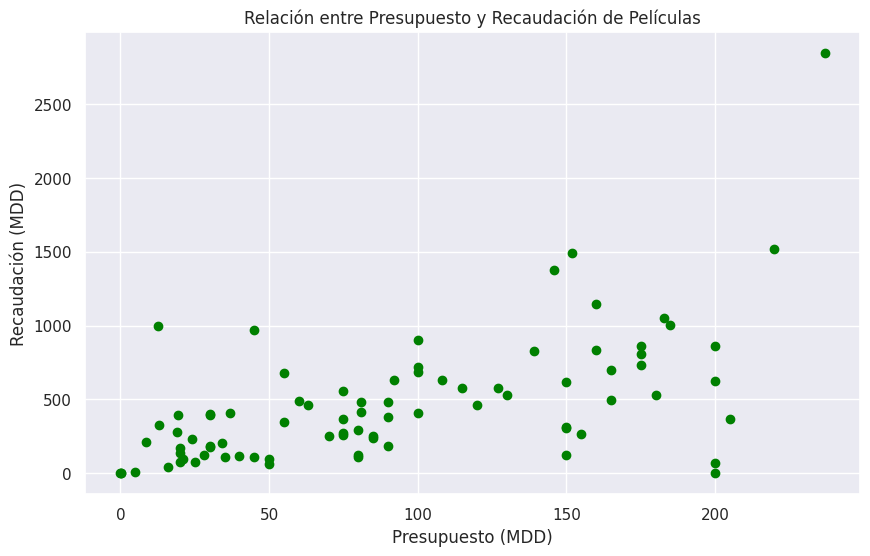

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(peliculas['Presupuesto(MDD)'], peliculas['Recaudacion(MDD)'], color='green')
plt.title('Relación entre Presupuesto y Recaudación de Películas')
plt.xlabel('Presupuesto (MDD)')
plt.ylabel('Recaudación (MDD)')
plt.show()


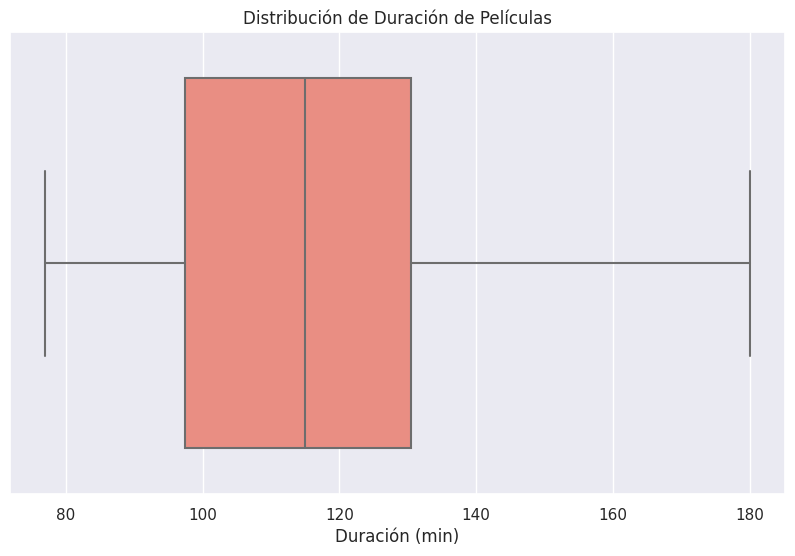

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(x=peliculas['Duracion(min)'], color='salmon')
plt.title('Distribución de Duración de Películas')
plt.xlabel('Duración (min)')
plt.show()


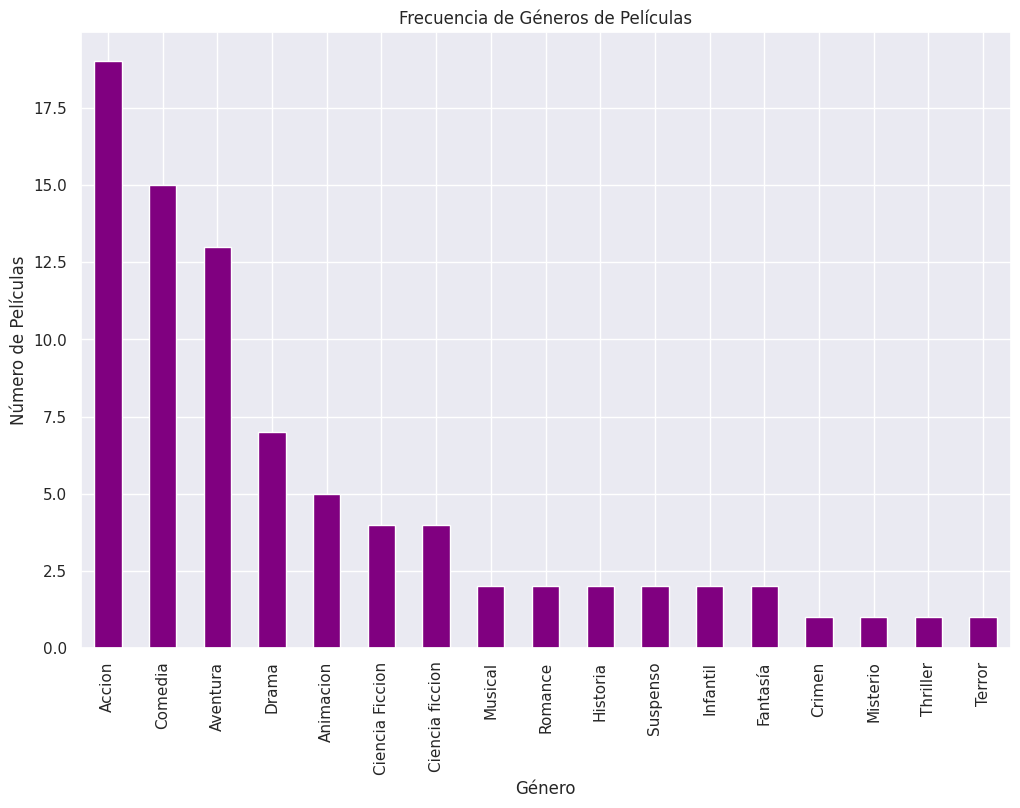

In [ ]:
plt.figure(figsize=(12, 8))
peliculas['Genero'].value_counts().plot(kind='bar', color='purple')
plt.title('Frecuencia de Géneros de Películas')
plt.xlabel('Género')
plt.ylabel('Número de Películas')
plt.show()

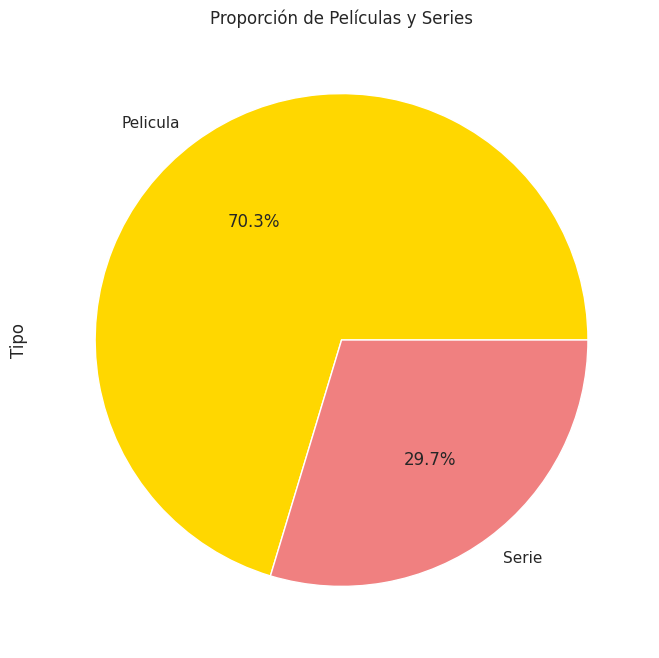

In [ ]:
plt.figure(figsize=(8, 8))
df['Tipo'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'lightcoral'])
plt.title('Proporción de Películas y Series')
plt.show()


In [ ]:
numeric = df[['AñoLanzamiento', 'Duracion(min)', 'Presupuesto(MDD)', 'Recaudacion(MDD)', 'Bere', 'Samuel', 'Eliel', 'Carlos', 'RatingPromedio', 'RottenTomatoes']].astype(float)
numeric.corr()

,AñoLanzamiento,Duracion(min),Presupuesto(MDD),Recaudacion(MDD),Bere,Samuel,Eliel,Carlos,RatingPromedio,RottenTomatoes
AñoLanzamiento,1.000000,-0.039738,0.157445,0.002188,0.173996,-0.047722,-0.090167,0.059793,0.009362,0.185808
Duracion(min),-0.039738,1.000000,0.143222,0.401659,-0.181259,-0.022269,0.053595,-0.085211,-0.082133,-0.169024
Presupuesto(MDD),0.157445,0.143222,1.000000,0.568761,-0.082329,0.050767,0.166202,0.018119,0.080925,0.005679
Recaudacion(MDD),0.002188,0.401659,0.568761,1.000000,-0.070525,0.037884,0.219416,0.095541,0.126383,0.036319
Bere,0.173996,-0.181259,-0.082329,-0.070525,1.000000,-0.046825,-0.013768,0.189590,0.347698,0.375137
Samuel,-0.047722,-0.022269,0.050767,0.037884,-0.046825,1.000000,-0.001520,0.127616,0.695203,-0.026778
Eliel,-0.090167,0.053595,0.166202,0.219416,-0.013768,-0.001520,1.000000,0.262479,0.491912,0.086981
Carlos,0.059793,-0.085211,0.018119,0.095541,0.189590,0.127616,0.262479,1.000000,0.624202,0.127370
RatingPromedio,0.009362,-0.082133,0.080925,0.126383,0.347698,0.695203,0.491912,0.624202,1.000000,0.182194
RottenTomatoes,0.185808,-0.169024,0.005679,0.036319,0.375137,-0.026778,0.086981,0.127370,0.182194,1.000000


In [ ]:
 #✏️ Ajusten modelos de regresión lineal simple para predecir el puntaje de la crítica.

msk = np.random.rand(len(df)) < 0.8
train = numeric[msk] #toma 80% de los datos para entrenar
test = numeric[~msk] #toma 20% de los datos para test
regr = linear_model.LinearRegression()

# Regresion lineal simple (para todas las variables)

array = ['AñoLanzamiento', 'Duracion(min)', 'Presupuesto(MDD)', 'Recaudacion(MDD)', 'Bere', 'Samuel', 'Eliel', 'Carlos', 'RatingPromedio']
y = np.asanyarray(train[['RottenTomatoes']])
scores = []
max_score = 0
min_score = 1

for i in array:
  x = np.asanyarray(train[[i]])
  y = np.asanyarray(train[['RottenTomatoes']])
  regr.fit(x,y)
  x_test = np.asanyarray(test[[i]])
  y_test = np.asanyarray(test[['RottenTomatoes']])
  score = regr.score(x_test, y_test)
  #print(score)

  if score > max_score:
    max_score = score
    max_score_var = i
  if score < min_score:
    min_score = score
    min_score_var = i
  scores.append(score)
  print(f'El score para la varriable {i} es: {score}')
print()
print(f'La variable con un mayor score es: {max_score_var} y su score es: {max_score}')
print(f'La variable con un peor score es: {min_score_var} y su score es: {min_score}')

El score para la varriable AñoLanzamiento es: 0.07811054870920686
El score para la varriable Duracion(min) es: 0.025967274395493622
El score para la varriable Presupuesto(MDD) es: -0.21966079137206385
El score para la varriable Recaudacion(MDD) es: 0.002648421893181818
El score para la varriable Bere es: 0.20574822480851052
El score para la varriable Samuel es: -0.000180212443734451
El score para la varriable Eliel es: 0.008120920037576362
El score para la varriable Carlos es: -0.10948295292700494
El score para la varriable RatingPromedio es: -0.008616022115240929

La variable con un mayor score es: Bere y su score es: 0.20574822480851052
La variable con un peor score es: Presupuesto(MDD) y su score es: -0.21966079137206385


In [ ]:
# Regresion lineal multiple (con todas las variables)
x = np.asanyarray(train[['AñoLanzamiento', 'Duracion(min)', 'Presupuesto(MDD)', 'Recaudacion(MDD)', 'Bere', 'Samuel', 'Eliel', 'Carlos', 'RatingPromedio']])
y = np.asanyarray(train[['RottenTomatoes']])
regr.fit(x,y)

x_test = np.asanyarray(test[['AñoLanzamiento', 'Duracion(min)', 'Presupuesto(MDD)', 'Recaudacion(MDD)', 'Bere', 'Samuel', 'Eliel', 'Carlos', 'RatingPromedio']])
y_test = np.asanyarray(test[['RottenTomatoes']])
score = regr.score(x_test, y_test)
print(f'El score es: {score}')

# ¿Cuál es el pvalue de F?
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(f'EL pvalue de F es: {model.f_pvalue}')

El score es: -0.1331930192395545
EL pvalue de F es: 0.009623671800118958


In [ ]:
# Regresion lineal multiple (con las dos variables con mejor score)
x = np.asanyarray(train[['Bere', 'RatingPromedio']])
y = np.asanyarray(train[['RottenTomatoes']])
regr.fit(x,y)

x_test = np.asanyarray(test[['Bere', 'RatingPromedio']])
y_test = np.asanyarray(test[['RottenTomatoes']])
score = regr.score(x_test, y_test)
print(f'El score es: {score}')

# ¿Cuál es el pvalue de F?
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(f'EL pvalue de F es: {model.f_pvalue}')

El score es: 0.18474331353064044
EL pvalue de F es: 0.0013294349982839496


In [ ]:
x = np.asanyarray(train[['AñoLanzamiento', 'Bere', 'RatingPromedio']])
y = np.asanyarray(train[['RottenTomatoes']])
regr.fit(x,y)

x_test = np.asanyarray(test[['AñoLanzamiento', 'Bere', 'RatingPromedio']])
y_test = np.asanyarray(test[['RottenTomatoes']])
score = regr.score(x_test, y_test)
print(f'El score es: {score}')

# ¿Cuál es el pvalue de F?
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(f'EL pvalue de F es: {model.f_pvalue}')

El score es: 0.22212862354195262
EL pvalue de F es: 0.0025312453441111047


In [ ]:
# Regresion lineal multiple (con las cuatro variables con mejor score)
x = np.asanyarray(train[['AñoLanzamiento', 'Bere', 'RatingPromedio','Duracion(min)']])
y = np.asanyarray(train[['RottenTomatoes']])
regr.fit(x,y)

x_test = np.asanyarray(test[['AñoLanzamiento', 'Bere', 'RatingPromedio', 'Duracion(min)']])
y_test = np.asanyarray(test[['RottenTomatoes']])
score = regr.score(x_test, y_test)
print(f'El score es: {score}')

# ¿Cuál es el pvalue de F?
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(f'EL pvalue de F es: {model.f_pvalue}')

El score es: 0.24104551362764626
EL pvalue de F es: 0.004640783388513856


# ✏️  En particular si queremos ver cual de las personas puede predecir mejor el review de los críticos necesitamos graficas de dispersion.

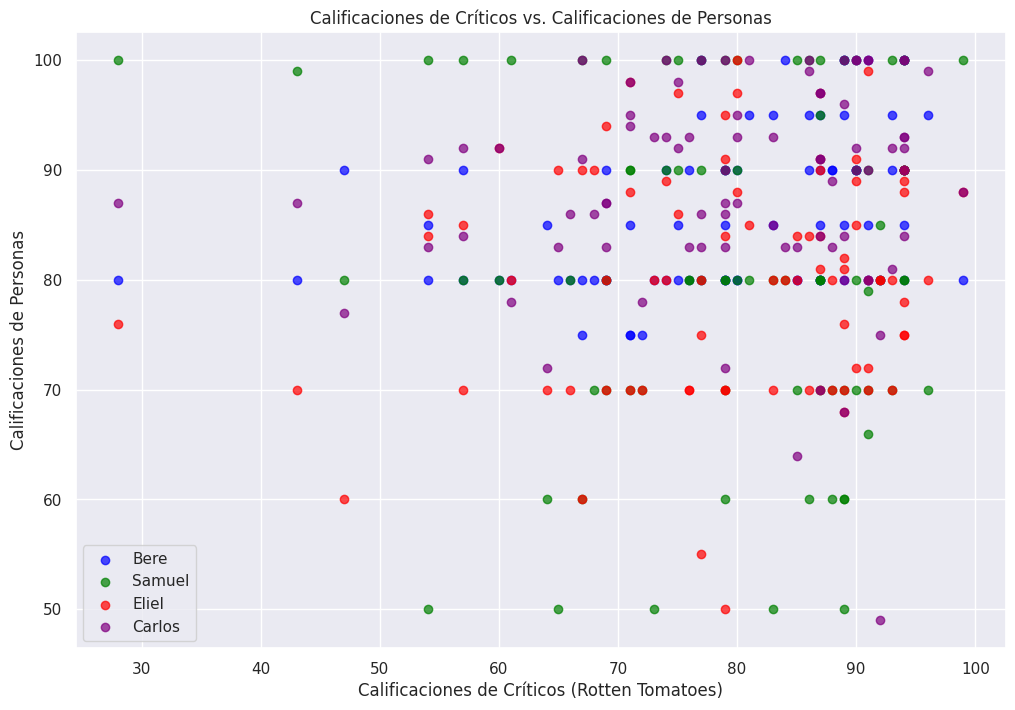

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(peliculas['RottenTomatoes'], peliculas['Bere'], label='Bere', color='blue', alpha=0.7)
plt.scatter(peliculas['RottenTomatoes'], peliculas['Samuel'], label='Samuel', color='green', alpha=0.7)
plt.scatter(peliculas['RottenTomatoes'], peliculas['Eliel'], label='Eliel', color='red', alpha=0.7)
plt.scatter(peliculas['RottenTomatoes'], peliculas['Carlos'], label='Carlos', color='purple', alpha=0.7)

plt.title('Calificaciones de Críticos vs. Calificaciones de Personas')
plt.xlabel('Calificaciones de Críticos (Rotten Tomatoes)')
plt.ylabel('Calificaciones de Personas')
plt.legend()
plt.grid(True)
plt.show()



# ✏️ ¿Qué variable [o persona] parece explicar mejor los puntajes de la crítica?

In [ ]:
import statsmodels.api as sm

X = peliculas[['Bere', 'Samuel', 'Eliel', 'Carlos']]
y = peliculas['RottenTomatoes']

correlation_bere = np.corrcoef(X['Bere'], y)[0, 1]
correlation_samuel = np.corrcoef(X['Samuel'], y)[0, 1]
correlation_eliel = np.corrcoef(X['Eliel'], y)[0, 1]
correlation_carlos = np.corrcoef(X['Carlos'], y)[0, 1]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(f"Coeficiente de correlación con Bere: {correlation_bere}")
print(f"Coeficiente de correlación con Samuel: {correlation_samuel}")
print(f"Coeficiente de correlación con Eliel: {correlation_eliel}")
print(f"Coeficiente de correlación con Carlos: {correlation_carlos}")

print("\nCoeficientes de regresión:")
print(model.summary())


Coeficiente de correlación con Bere: 0.37520387783274084
Coeficiente de correlación con Samuel: -0.0541218310115164
Coeficiente de correlación con Eliel: 0.1230404348979531
Coeficiente de correlación con Carlos: 0.09158282140404328

Coeficientes de regresión:
                            OLS Regression Results                            
Dep. Variable:         RottenTomatoes   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     3.510
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0109
Time:                        02:01:43   Log-Likelihood:                -326.13
No. Observations:                  83   AIC:                             662.3
Df Residuals:                      78   BIC:                             674.4
Df Model:                           4                                         
Covariance Type:            n

# ✏️ ¿Cómo se relacionan estos hallazgos con lo que encontraron en el análisis exploratorio?

# ✏️ Con base en la R2 de sus modelos, ¿Cuál elegirían y por qué?

In [ ]:
X_bere = peliculas[['Bere']]
X_samuel = peliculas[['Samuel']]
X_eliel = peliculas[['Eliel']]
X_carlos = peliculas[['Carlos']]

model_bere = sm.OLS(y, sm.add_constant(X_bere)).fit()
model_samuel = sm.OLS(y, sm.add_constant(X_samuel)).fit()
model_eliel = sm.OLS(y, sm.add_constant(X_eliel)).fit()
model_carlos = sm.OLS(y, sm.add_constant(X_carlos)).fit()

print(f"R-squared para Bere: {model_bere.rsquared}")
print(f"R-squared para Samuel: {model_samuel.rsquared}")
print(f"R-squared para Eliel: {model_eliel.rsquared}")
print(f"R-squared para Carlos: {model_carlos.rsquared}")


R-squared para Bere: 0.14077794994072568
R-squared para Samuel: 0.0029291725920389533
R-squared para Eliel: 0.015138948619877302
R-squared para Carlos: 0.008387413176324632


Elegiriamos el modelo de Bere, ya que es el que tiene una R2 mayor, por lo que se relaciona mejor con los datos de la critica

# ✏️ Hagan regresión lineal multiple con todas las variables numéricas independientes.



Regresion lineal multiple (Peliculas)

Coefficients: [[ 0.03646145  0.13552165 -0.01674184  0.00258326  0.15970341  0.74541481
  -0.02018195  0.02099832 -0.10741754]]
Intercept: -77.58055139220004
Rotten Tomatoes prediction: -16.537227795356237
R^2: 0.22208316566016828
R^2: 0.22208316566016784
F_P value: 0.013269870856787385
P value for AñoLanzamiento : 0.8498474072810469
P value for Duracion(min) : 0.043761617709453714
P value for Presupuesto(MDD) : 0.5711511220826648
P value for Recaudacion(MDD) : 0.5353290198512854
P value for RatingPromedio : 0.0031692830582954017
P value for Bere : 0.00031536210517302385
P value for Samuel : 0.8306683896819916
P value for Eliel : 0.8860933299879267
P value for Carlos : 0.5004557421751441


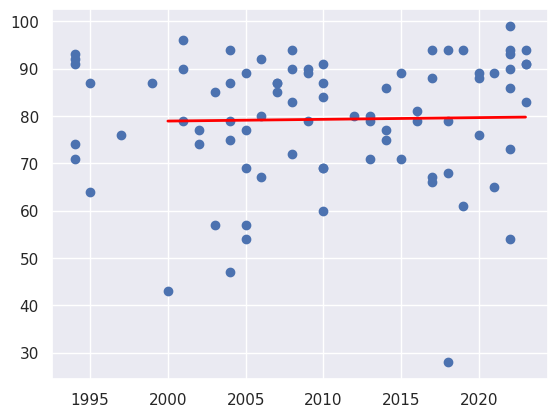

In [ ]:
# Variables para la regresión
array = ['AñoLanzamiento', 'Duracion(min)', 'Presupuesto(MDD)', 'Recaudacion(MDD)', 'RatingPromedio', 'Bere', 'Samuel', 'Eliel', 'Carlos']

# REGRESIÓN LINEAL MULTIPLE
regr = linear_model.LinearRegression()
x_mult = np.asanyarray(peliculas[array])
y_mult = np.asanyarray(peliculas[['RottenTomatoes']])
regr.fit(x_mult, y_mult)

# Coeficientes y término independiente
print('Coefficients:', regr.coef_[:])
print('Intercept:', regr.intercept_[0])

# Predicción
prediction = regr.predict([[1, 4, 13, 11, 12, 80, 7, 5, 8]])  # Cambia los valores de entrada según tus datos
print('Rotten Tomatoes prediction:', prediction[0][0])

# Evaluación del modelo
xtest = np.asanyarray(peliculas[array])
ytest = np.asanyarray(peliculas[['RottenTomatoes']])
score = regr.score(xtest, ytest)
print('R^2:', score)

# Recta proyectada correctamente
plt.scatter(peliculas['AñoLanzamiento'], peliculas['RottenTomatoes'])
xline = np.linspace(2000, 2023, 50)
b2 = regr.coef_[:, 1] * peliculas['Duracion(min)'].mean()
b3 = regr.coef_[:, 2] * peliculas['Presupuesto(MDD)'].mean()
b4 = regr.coef_[:, 3] * peliculas['Recaudacion(MDD)'].mean()
b5 = regr.coef_[:, 4] * peliculas['RatingPromedio'].mean()
b6 = regr.coef_[:, 5] * peliculas['Bere'].mean()
b7 = regr.coef_[:, 6] * peliculas['Samuel'].mean()
b8 = regr.coef_[:, 7] * peliculas['Eliel'].mean()
b9 = regr.coef_[:, 8] * peliculas['Carlos'].mean()
yline = regr.coef_[:, 0] * xline + regr.intercept_[0] + b2 + b3 + b4 + b5 + b6 + b7 + b8 + b9
plt.plot(xline, yline, lw=2, color='red')

# Análisis de regresión con statsmodels
X = sm.add_constant(x_mult)
model = sm.OLS(y_mult, X).fit()
R2 = model.rsquared
print('R^2:', R2)
print('F_P value:', model.f_pvalue)

for i, element in enumerate(array):
    print('P value for', element, ':', model.pvalues[i + 1])


Regresion lineal multiple (Series)

Coefficients: [[ 0.42255131 -0.10274124 -0.01439311  0.01359366 -0.01585687  0.10312237
  -0.00264802 -0.29285809  0.12895626]]
Intercept: -756.7965926020884
Rotten Tomatoes prediction: -749.2142558811831
R^2: 0.34973402034251344
R^2: 0.34973402034251166
F_P value: 0.1343324912145394
P value for AñoLanzamiento : 0.08059200962712397
P value for Duracion(min) : 0.4146323658005985
P value for Presupuesto(MDD) : 0.2831875707931839
P value for Recaudacion(MDD) : 0.06432950661177315
P value for RatingPromedio : 0.8023802968815297
P value for Bere : 0.6081233344374604
P value for Samuel : 0.968911453168256
P value for Eliel : 0.09198201876051632
P value for Carlos : 0.42919460309606317


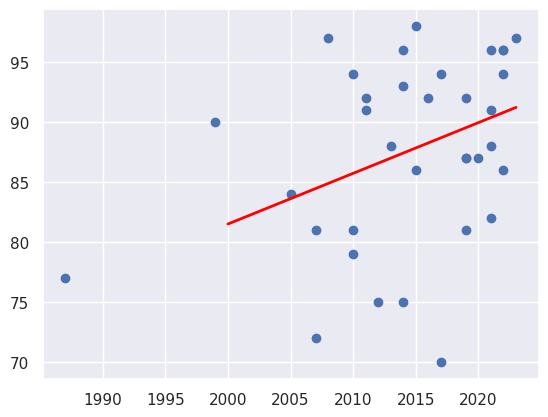

In [ ]:
# Variables para la regresión
array = ['AñoLanzamiento', 'Duracion(min)', 'Presupuesto(MDD)', 'Recaudacion(MDD)', 'RatingPromedio', 'Bere', 'Samuel', 'Eliel', 'Carlos']

# REGRESIÓN LINEAL MULTIPLE
regr = linear_model.LinearRegression()
x_mult = np.asanyarray(series[array])
y_mult = np.asanyarray(series[['RottenTomatoes']])
regr.fit(x_mult, y_mult)

# Coeficientes y término independiente
print('Coefficients:', regr.coef_[:])
print('Intercept:', regr.intercept_[0])

# Predicción
prediction = regr.predict([[1, 4, 13, 11, 12, 80, 7, 5, 8]])  # Cambia los valores de entrada según tus datos
print('Rotten Tomatoes prediction:', prediction[0][0])

# Evaluación del modelo
xtest = np.asanyarray(series[array])
ytest = np.asanyarray(series[['RottenTomatoes']])
score = regr.score(xtest, ytest)
print('R^2:', score)

# Recta proyectada correctamente
plt.scatter(series['AñoLanzamiento'], series['RottenTomatoes'])
xline = np.linspace(2000, 2023, 50)
b2 = regr.coef_[:, 1] * series['Duracion(min)'].mean()
b3 = regr.coef_[:, 2] * series['Presupuesto(MDD)'].mean()
b4 = regr.coef_[:, 3] * series['Recaudacion(MDD)'].mean()
b5 = regr.coef_[:, 4] * series['RatingPromedio'].mean()
b6 = regr.coef_[:, 5] * series['Bere'].mean()
b7 = regr.coef_[:, 6] * series['Samuel'].mean()
b8 = regr.coef_[:, 7] * series['Eliel'].mean()
b9 = regr.coef_[:, 8] * series['Carlos'].mean()
yline = regr.coef_[:, 0] * xline + regr.intercept_[0] + b2 + b3 + b4 + b5 + b6 + b7 + b8 + b9
plt.plot(xline, yline, lw=2, color='red')

# Análisis de regresión con statsmodels
X = sm.add_constant(x_mult)
model = sm.OLS(y_mult, X).fit()
R2 = model.rsquared
print('R^2:', R2)
print('F_P value:', model.f_pvalue)

for i, element in enumerate(array):
    print('P value for', element, ':', model.pvalues[i + 1])


# ✏️ ¿Qué modelo escogerían como final? ¿Por qué?

Claramente usaremos el lso modelos de regresion lineal multiple, ya que tienen un R2 de 0.34, lo cual nos da una prediccion mejor.

# ✏️ Interpreten los pvalues del modelo final.

AñoLanzamiento (p-value: 0.0806): El p-value es mayor que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que el coeficiente de AñoLanzamiento es igual a cero. No es estadísticamente significativo.

Duracion(min) (p-value: 0.4146): El p-value es mayor que 0.05, lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula de que el coeficiente de Duracion(min) es igual a cero. No es estadísticamente significativo.

Presupuesto(MDD) (p-value: 0.2832): Similar al caso anterior, no hay suficiente evidencia para rechazar la hipótesis nula de que el coeficiente es igual a cero. No es estadísticamente significativo.

Recaudacion(MDD) (p-value: 0.0643): El p-value es menor que 0.05, lo que sugiere que hay evidencia suficiente para rechazar la hipótesis nula. El coeficiente de Recaudacion(MDD) es estadísticamente significativo.

RatingPromedio (p-value: 0.8024): El p-value es mayor que 0.05, indicando que no hay suficiente evidencia para rechazar la hipótesis nula. No es estadísticamente significativo.

Bere (p-value: 0.6081): No hay suficiente evidencia para rechazar la hipótesis nula. No es estadísticamente significativo.

Samuel (p-value: 0.9689): No hay suficiente evidencia para rechazar la hipótesis nula. No es estadísticamente significativo.

Eliel (p-value: 0.0920): El p-value es menor que 0.05, lo que sugiere que hay evidencia suficiente para rechazar la hipótesis nula. El coeficiente de Eliel es estadísticamente significativo.

Carlos (p-value: 0.4292): No hay suficiente evidencia para rechazar la hipótesis nula. No es estadísticamente significativo.

# ✏️ Si filtran por pelicula/serie o por categoría y hacen regresión con cada conjunto mejoran los resultados?

Como se puede observar, al separar los datos por la catregoria Pelicula/Serie, el score, o R2 aumenta de un valor negativo a un valor de 0.34, modelos los cuales elegimos para la prediccion.

# ✏️ Utilicen su modelo final para predecir el puntaje de la crítica de estas nuevas películas o series.

In [ ]:
# Valores de las nuevas películas
nuevas_peliculas = pd.DataFrame({
    'AñoLanzamiento': [2022, 2023, 2021],
    'Duracion(min)': [120, 110, 95],
    'Presupuesto(MDD)': [15, 10, 8],
    'Recaudacion(MDD)': [20, 18, 12],
    'RottenTomatoes': [80, 75, 85],
    'Bere': [7, 6, 8],
    'Samuel': [5, 4, 6],
    'Eliel': [8, 7, 9],
    'Carlos': [6, 5, 7]
})

# Utilizar el modelo para predecir el puntaje de la crítica
predicciones = regr.predict(nuevas_peliculas)

# Mostrar las predicciones
nuevas_peliculas['Prediccion_RatingPromedio'] = predicciones
print(nuevas_peliculas[['AñoLanzamiento', 'Prediccion_RatingPromedio']])


   AñoLanzamiento  Prediccion_RatingPromedio
0            2022                  83.200119
1            2023                  84.837573
2            2021                  85.195390


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Nombre,AñoLanzamiento,Genero,Idioma,Duracion(min),NumeroTempordas,Presupuesto(MDD),Recaudacion(MDD),Bere,Samuel,Eliel,Carlos,RatingPromedio
The Nice Guys,2016,Accion,Inglés,114,NA,50,62.8,80,70,70,87,76.75
Crepúsculo,2008,Drama,Inglés,122,NA,37,408.4,75,70,70,78,73.25
The Man from Earth,2007,Accion,Inglés,87,NA,0.2,1.3,80,70,80,64,73.5
The Prestige,2006,Thriller,Inglés,130,NA,45,109.0,80,85,80,49,73.5
The Secret Life of Walter Mitty,2013,Comedia,Inglés,116,NA,90,188.2,75,90,70,98,83.25
A Ghost Story,2017,Terror,Inglés,92,NA,0.1,1.9,80,80,70,86,79
Super Cool,2007,Comedia,Inglés,119,NA,20,170.8,80,95,70,70,78.75
Primer,2004,Ciencia Ficción,Inglés,77,NA,0.007,0.4,80,90,70,86,81.5
Eternal Sunshine of the Spotless Mind,2004,Romance,Inglés,108,NA,20,74.8,90,80,75,84,82.25
Moon,2009,Ciencia Ficción,Inglés,97,NA,5,10.9,80,70,76,80,76.5
'''), header=None)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Nombre,AñoLanzamiento,Genero,Idioma,Duracion(min),NumeroTempordas,Presupuesto(MDD),Recaudacion(MDD),Bere,Samuel,Eliel,Carlos,RatingPromedio
1,The Nice Guys,2016,Accion,Inglés,114,NaN,50,62.8,80,70,70,87,76.75
2,Crepúsculo,2008,Drama,Inglés,122,NaN,37,408.4,75,70,70,78,73.25
3,The Man from Earth,2007,Accion,Inglés,87,NaN,0.2,1.3,80,70,80,64,73.5
4,The Prestige,2006,Thriller,Inglés,130,NaN,45,109.0,80,85,80,49,73.5
5,The Secret Life of Walter Mitty,2013,Comedia,Inglés,116,NaN,90,188.2,75,90,70,98,83.25
6,A Ghost Story,2017,Terror,Inglés,92,NaN,0.1,1.9,80,80,70,86,79
7,Super Cool,2007,Comedia,Inglés,119,NaN,20,170.8,80,95,70,70,78.75
8,Primer,2004,Ciencia Ficción,Inglés,77,NaN,0.007,0.4,80,90,70,86,81.5
9,Eternal Sunshine of the Spotless Mind,2004,Romance,Inglés,108,NaN,20,74.8,90,80,75,84,82.25


In [ ]:
# Predicciones para todas las películas
predictions_all = regr.predict([
    [2016, 114, 50, 62.8, 76.75, 80, 70, 70, 87],
    [2008, 122, 37, 408.4, 73.25, 75, 70, 70, 78],
    [2007, 87, 0.2, 1.3, 73.5, 80, 70, 80, 64],
    [2006, 130, 45, 109.0, 73.5, 80, 85, 80, 49],
    [2013, 116, 90, 188.2, 83.25, 75, 90, 70, 98],
    [2017, 92, 0.1, 1.9, 79, 80, 80, 70, 86],
    [2007, 119, 20, 170.8, 78.75, 80, 95, 70, 70],
    [2004, 77, 0.007, 0.4, 81.5, 80, 90, 70, 86],
    [2004, 108, 20, 74.8, 82.25, 90, 80, 75, 84],
    [2009, 97, 5, 10.9, 76.5, 80, 70, 76, 80]
])

# Imprimir las predicciones
for i, prediction in enumerate(predictions_all):
    print(f'Predicción para la película {i + 1} (Rotten Tomatoes): {prediction[0]}')



Predicción para la película 1 (Rotten Tomatoes): 81.05491096074377
Predicción para la película 2 (Rotten Tomatoes): 80.11693100822015
Predicción para la película 3 (Rotten Tomatoes): 74.0636896342761
Predicción para la película 4 (Rotten Tomatoes): 68.06842634206828
Predicción para la película 5 (Rotten Tomatoes): 81.4575720540164
Predicción para la película 6 (Rotten Tomatoes): 83.43701774816873
Predicción para la película 7 (Rotten Tomatoes): 76.34798113901536
Predicción para la película 8 (Rotten Tomatoes): 79.39979512668151
Predicción para la película 9 (Rotten Tomatoes): 76.26203159805482
Predicción para la película 10 (Rotten Tomatoes): 77.12995396478743



# ✏️ Busquen en la misma comunidad dedicada a evaluar películas y series que utilizaron antes, el puntaje de estas nuevas películas y series.

In [ ]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
Nombre,Rotten tomatoes
The Nice Guys,79
Crepúsculo,72
The Man from Earth,85
The Prestige,92
The Secret Life of Walter Mitty,71
A Ghost Story,66
Super Cool,87
Primer,79
Eternal Sunshine of the Spotless Mind,94
Moon,89
'''), header=None)


,0,1
0,Nombre,Rotten tomatoes
1,The Nice Guys,79
2,Crepúsculo,72
3,The Man from Earth,85
4,The Prestige,92
5,The Secret Life of Walter Mitty,71
6,A Ghost Story,66
7,Super Cool,87
8,Primer,79
9,Eternal Sunshine of the Spotless Mind,94


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

valores_reales = [79, 72, 85, 92, 71, 66, 87, 79, 94, 89]

# Imprimir las predicciones y los valores reales
for i, (prediction, valor_real) in enumerate(zip(predictions_all, valores_reales)):
    print(f'Película {i + 1}: Predicción={prediction[0]}, Valor Real={valor_real}')

# Calcular métricas
mae = mean_absolute_error(valores_reales, predictions_all)
mse = mean_squared_error(valores_reales, predictions_all)

# Imprimir las métricas
print()
print(f'MAE (Error Absoluto Medio): {mae}')
print(f'MSE (Error Cuadrático Medio): {mse}')

Película 1: Predicción=81.05491096074377, Valor Real=79
Película 2: Predicción=80.11693100822015, Valor Real=72
Película 3: Predicción=74.0636896342761, Valor Real=85
Película 4: Predicción=68.06842634206828, Valor Real=92
Película 5: Predicción=81.4575720540164, Valor Real=71
Película 6: Predicción=83.43701774816873, Valor Real=66
Película 7: Predicción=76.34798113901536, Valor Real=87
Película 8: Predicción=79.39979512668151, Valor Real=79
Película 9: Predicción=76.26203159805482, Valor Real=94
Película 10: Predicción=77.12995396478743, Valor Real=89

MAE (Error Absoluto Medio): 11.359414421962857
MSE (Error Cuadrático Medio): 174.49995892887003
